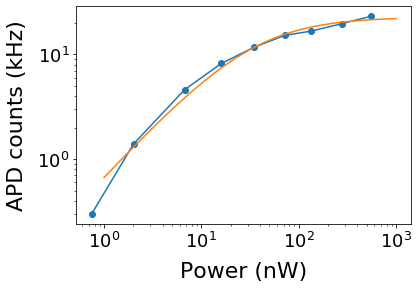

In [24]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import prettify_plot
import numpy as np
from scipy.optimize import curve_fit

def sat_func(P, P0, I0):
    return I0 * (1-np.exp(-P/P0))

def sat_func2(P, P0, I0):
    return I0 /(1+P0/P)
# fit data
# data from 11-18-19
bg = 0.8
x = (np.array([0.045, 0.062, 0.125, 0.25, 0.5, 1, 1.84, 3.8, 7.5]) - 0.035) / 7500 * 560 * 1000
y = np.array([1.1, 2.2, 5.4 , 9, 12.5, 16, 17.5, 20.5, 24]) - bg
xx = np.logspace(0, 3, 100)
coeffs, _ = curve_fit(sat_func2, x, y)
y_arrf = sat_func2(xx, *coeffs)
#y_arrf = sat_func(xx, 100, 10)

fig, ax = plt.subplots()
ax.loglog(x, y, 'o-')
ax.loglog(xx, y_arrf)
prettify_plot(ax, "Power (nW)", "APD counts (kHz)")

In [25]:
coeffs

array([33.05830808, 22.72237708])